In this notebook, we will be recreating the analysis made in https://doi.org/10.1038/s41550-020-01295-8 by Stein et al. The data and their code is aviable in his GitHub.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
from datetime import date

#gamma function and integration
from scipy import special, optimize
from scipy import integrate


#Fitting the spectrum
from scipy.optimize import curve_fit


#Using csv tables
import pandas as pd

#Astropy module to handle units
import astropy
from astropy.io import ascii
from astropy import units as u
from astropy.units import Quantity
from astropy import constants as const

#Importing the constant that will be needed
from astropy.constants import c, k_B, m_e, e

First, let's get the data that will be fitted.

In [2]:
data_rec = astropy.io.ascii.read(os.path.join("Data/", 'at2019dsg_merged.dat'), format='fixed_width')
data_rec.colnames

['date', 'mjd', 'nu_GHz', 'inst', 'flux_mJy', 'eflux_mJy']

Quick function to convert dates to days since the detection.

In [18]:
def DaysSinceDetection(date_string):
    """
    Returns the days since the optical detection of the source AT2019dsg  (2019 April 1) given a date (string) in format 
    2019/04/01
    Parameters
    :date: Date that want to be converted

    Output
    :days:
    """
    splitted=date_string.split('/')
    date_converted= date(2000+int(splitted[0]), int(splitted[1]), int(splitted[2]))
    date0= date(2019, 4, 1)
    days= date_converted - date0
    return days.days

Let's make a plot to visualize the data.

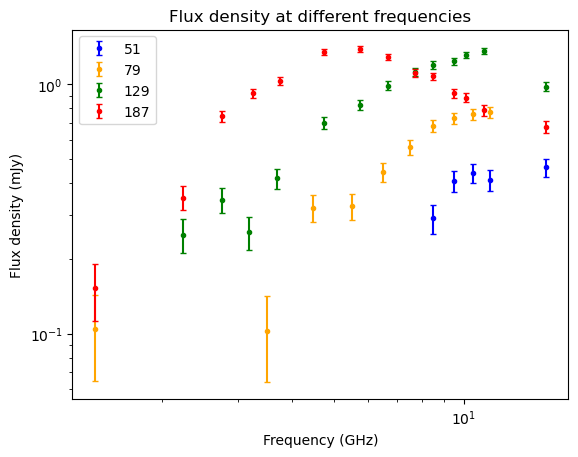

In [19]:
#Array with the dates
list_dates= set(data_rec['date'])
date_list=[[[],[]], [[],[]], [[],[]], [[],[]]]

for data in data_rec:
    if data['date']== '19/05/22' or data['date']== '19/05/21':
        date_list[0][0].append(data['nu_GHz'])
        date_list[0][1].append(data['flux_mJy'])
    if data['date']== '19/06/19':
        date_list[1][0].append(data['nu_GHz'])
        date_list[1][1].append(data['flux_mJy'])
    if data['date']== '19/08/08' or  data['date']== '19/08/07':
        date_list[2][0].append(data['nu_GHz'])
        date_list[2][1].append(data['flux_mJy'])
    if data['date']== '19/10/05':
        date_list[3][0].append(data['nu_GHz'])
        date_list[3][1].append(data['flux_mJy'])
        
#First optical detection was 2019 april 9

plt.errorbar(date_list[0][0], date_list[0][1], yerr= data['eflux_mJy'],fmt= '.',capsize= 2 , c='blue',
             zorder=8, label=str(DaysSinceDetection('19/05/22')))
plt.errorbar(date_list[1][0], date_list[1][1], yerr= data['eflux_mJy'],fmt= '.',capsize= 2 , c='orange',
             zorder=8, label=str(DaysSinceDetection('19/06/19')))
plt.errorbar(date_list[2][0], date_list[2][1], yerr= data['eflux_mJy'],fmt= '.',capsize= 2 , c='green',
             zorder=8, label=str(DaysSinceDetection('19/08/08')))
plt.errorbar(date_list[3][0], date_list[3][1], yerr= data['eflux_mJy'],fmt= '.',capsize= 2 , c='red',
             zorder=8, label=str(DaysSinceDetection('19/10/05')))
     

plt.yscale('log')
plt.xscale('log')
plt.xlabel(f"Frequency (GHz)")
plt.ylabel(f'Flux density (mJy)')
plt.title('Flux density at different frequencies')
plt.legend()
plt.show()

Now we will be defining the model to fit the data